In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import datetime

In [2]:
df = pd.read_csv(r'C:\Users\KSSEEB\OneDrive\Documents\Machine Learning\Linear Regression\Real_Estate.csv')

In [ ]:
df.head()


,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
df.tail()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620
413,2013-08-01 09:49:41.506402,12.0,90.45606,6,24.952904,121.526395,37.580554


In [5]:
df['House age'].max()

np.float64(42.7)

In [6]:
df.shape

(414, 7)

In [7]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [8]:
df.dtypes

Transaction date                        object
House age                              float64
Distance to the nearest MRT station    float64
Number of convenience stores             int64
Latitude                               float64
Longitude                              float64
House price of unit area               float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [10]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
House age,414.0,18.405072,11.757670,0.000000,9.900000,16.450000,30.375000,42.700000
Distance to the nearest MRT station,414.0,1064.468233,1196.749385,23.382840,289.324800,506.114400,1454.279000,6306.153000
Number of convenience stores,414.0,4.265700,2.880498,0.000000,2.000000,5.000000,6.750000,10.000000
Latitude,414.0,24.973605,0.024178,24.932075,24.952422,24.974353,24.994947,25.014578
Longitude,414.0,121.520268,0.026989,121.473888,121.496866,121.520912,121.544676,121.565321
House price of unit area,414.0,29.102149,15.750935,0.000000,18.422493,30.394070,40.615184,65.571716


In [13]:
df.describe(include='object').T

,count,unique,top,freq
Transaction date,414,414,2013-08-01 09:49:41.506402,1


In [ ]:
# Assuming the "Transaction date" column is in the format YYYY-MM-DD
df['Date'] = pd.to_datetime(df['Transaction date'].str.split().str[0], format='%Y-%m-%d')
df['Time'] = pd.to_timedelta(df['Transaction date'].str.split().str[1])

# Now you can extract the year using pd.DatetimeIndex()
df['Year'] = pd.DatetimeIndex(df['Transaction date']).year

df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Date,Time,Year
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673,2012-09-02,0 days 16:42:30.519336,2012
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725,2012-09-04,0 days 22:52:29.919544,2012
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267,2012-09-05,0 days 01:10:52.349449,2012
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638,2012-09-05,0 days 13:26:01.189083,2012
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710,2012-09-06,0 days 08:29:47.910523,2012


In [15]:
num = df.drop(['Transaction date', 'Latitude','Longitude','Date','Time'],axis=1)
num

,House age,Distance to the nearest MRT station,Number of convenience stores,House price of unit area,Year
0,13.3,4082.01500,8,6.488673,2012
1,35.5,274.01440,2,24.970725,2012
2,1.1,1978.67100,10,26.694267,2012
3,22.2,1055.06700,5,38.091638,2012
4,8.5,967.40000,6,21.654710,2012
...,...,...,...,...,...
409,18.3,170.12890,6,29.096310,2013
410,11.9,323.69120,2,33.871347,2013
411,0.0,451.64190,8,25.255105,2013
412,35.9,292.99780,5,25.285620,2013


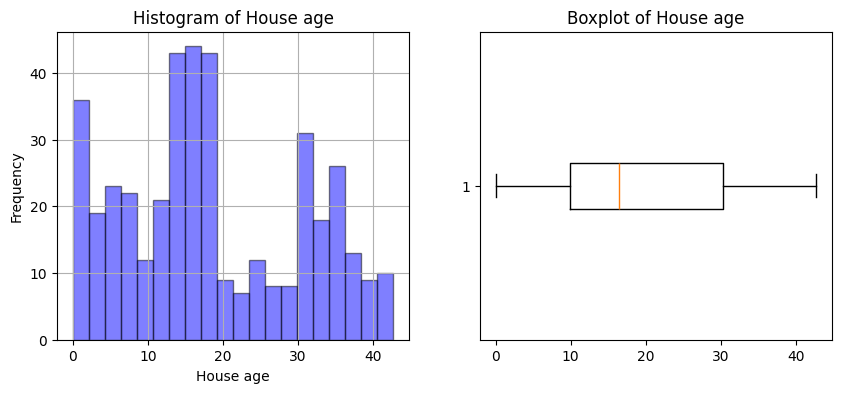

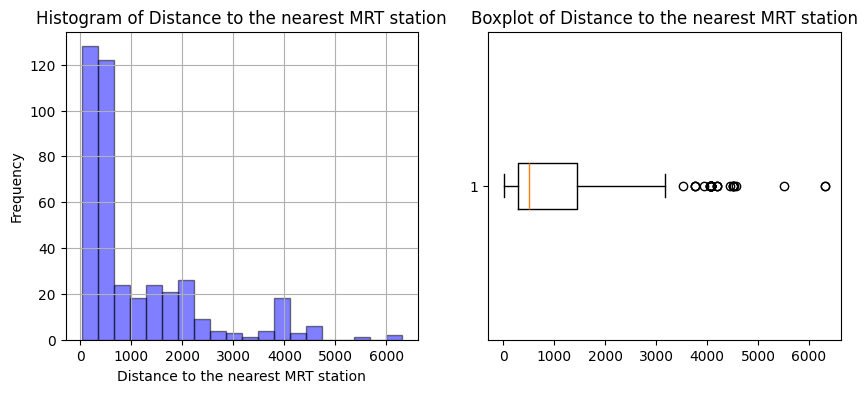

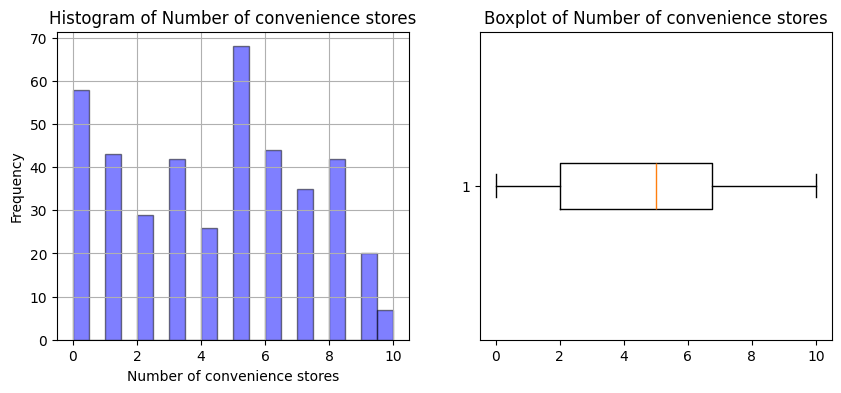

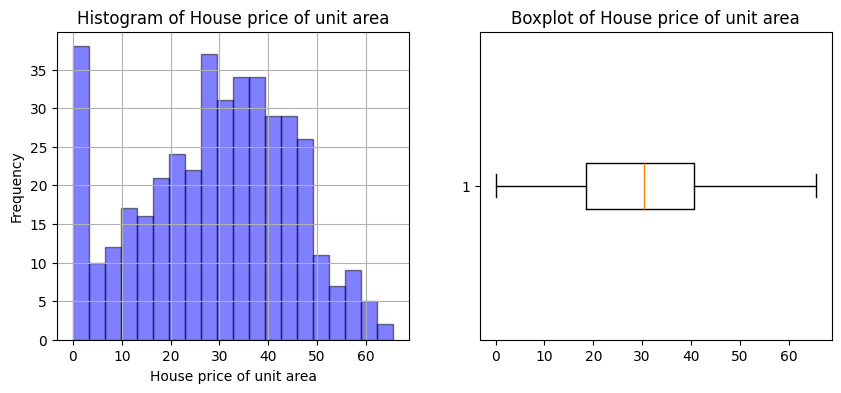

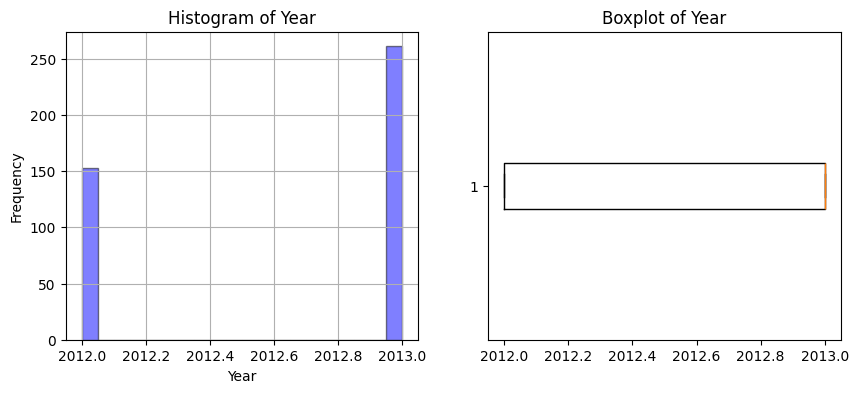

In [16]:
for i in num.columns:
    
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    df[i].hist(bins=20, alpha=0.5, color='b',edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.boxplot(df[i], vert=False)
    plt.title(f'Boxplot of {i}')

    plt.show()



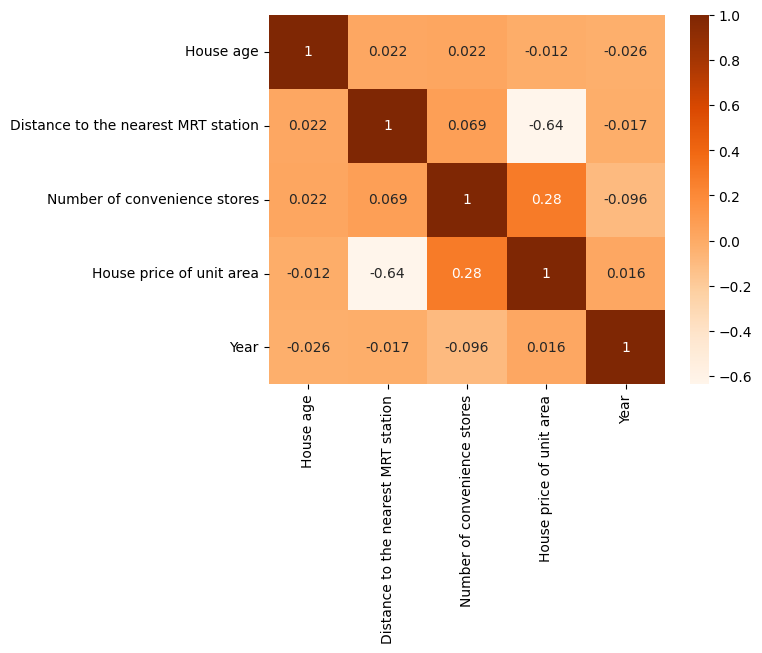

In [17]:
corr = num.corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='Oranges')
plt.show()

In [18]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Date', 'Time', 'Year'],
      dtype='object')

In [19]:
X = df[['Distance to the nearest MRT station']]
y = df[['House price of unit area']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
len(X_test)

83

In [24]:
X_test

,Distance to the nearest MRT station
358,431.1114
350,1360.1390
373,250.6310
399,208.3905
369,1414.8370
...,...
31,1828.3190
283,815.9314
157,3171.3290
203,4197.3490


In [25]:
y_pred = model.predict(X_test)
y_pred

array([[33.78462636],
       [26.40030431],
       [35.21916436],
       [35.55491052],
       [25.96554043],
       [33.54625099],
       [25.68825903],
       [35.55491052],
       [35.78491221],
       [ 7.2306015 ],
       [34.9923031 ],
       [29.54303405],
       [19.5926783 ],
       [33.91310338],
       [35.72109814],
       [34.8824143 ],
       [36.49230559],
       [31.50197449],
       [33.37411556],
       [33.1373267 ],
       [33.37411556],
       [34.63873733],
       [33.52144072],
       [33.37411556],
       [20.14299664],
       [32.43538627],
       [15.94951784],
       [23.59853413],
       [34.16480749],
       [27.38253304],
       [35.85424408],
       [35.96939237],
       [35.67259516],
       [34.91160893],
       [34.91160893],
       [33.68112174],
       [17.58146017],
       [35.85903064],
       [34.10688004],
       [34.10369113],
       [32.12730942],
       [36.37821333],
       [ 4.76563065],
       [ 4.76563065],
       [35.73741391],
       [33

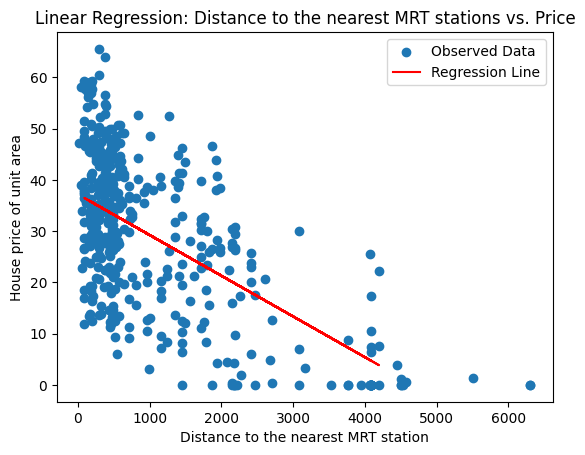

In [26]:
# Scatter plot of the data points
plt.scatter(df['Distance to the nearest MRT station'], df['House price of unit area'], label='Observed Data')

# Plot the regression line
plt.plot(X_test['Distance to the nearest MRT station'], y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House price of unit area')
plt.title('Linear Regression: Distance to the nearest MRT stations vs. Price')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred) # Cost function
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # cost function

# Print the evaluation metrics
print("Evaluation Metrics:")

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Evaluation Metrics:
Mean Squared Error (MSE): 148.27
Mean Absolute Error (MAE): 10.1545
R-squared (R²): 0.4640


**METHOD 2 OLS METHOD**

In [20]:
x = sm.add_constant(X)
x

,const,Number of convenience stores
0,1.0,8
1,1.0,2
2,1.0,10
3,1.0,5
4,1.0,6
...,...,...
409,1.0,6
410,1.0,2
411,1.0,8
412,1.0,5


In [21]:
model = sm.OLS(y,X).fit()

In [22]:
print(model.summary())

                                    OLS Regression Results                                   
Dep. Variable:     House price of unit area   R-squared (uncentered):                   0.646
Model:                                  OLS   Adj. R-squared (uncentered):              0.646
Method:                       Least Squares   F-statistic:                              754.9
Date:                      Tue, 15 Oct 2024   Prob (F-statistic):                    2.90e-95
Time:                              19:20:07   Log-Likelihood:                         -1820.8
No. Observations:                       414   AIC:                                      3644.
Df Residuals:                           413   BIC:                                      3648.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
                                   coef    std err          

In [23]:
y_pred = model.predict(X)
y_pred

0      41.354268
1      10.338567
2      51.692835
3      25.846418
4      31.015701
         ...    
409    31.015701
410    10.338567
411    41.354268
412    25.846418
413    31.015701
Length: 414, dtype: float64

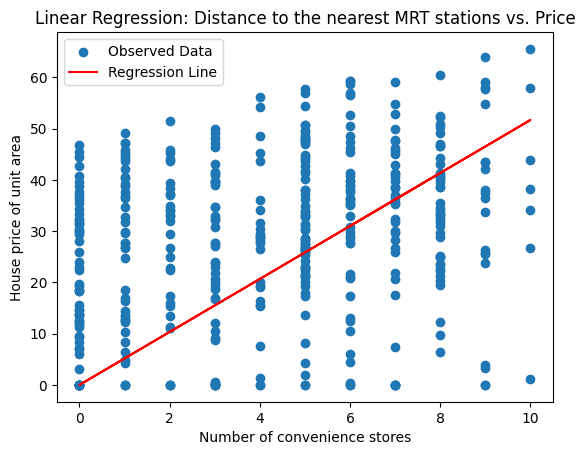

In [24]:
# Scatter plot of the data points
plt.scatter(df['Number of convenience stores'], df['House price of unit area'], label='Observed Data')

# Plot the regression line
plt.plot(df['Number of convenience stores'], y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Number of convenience stores')
plt.ylabel('House price of unit area')
plt.title('Linear Regression: Distance to the nearest MRT stations vs. Price')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [27]:
df['Number of convenience stores'].max()

np.int64(10)

In [36]:
new_data = [10]
prediction = model.predict([new_data])
print(f"Predicted value: {prediction[0]}")

Predicted value: 51.69283533699265
